In [4]:
import InfBot as ib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# simple test

In [5]:
import importlib
importlib.reload(ib)

<module 'InfBot' from '/home/sunghyuk/Python/GitHub/Information Bottleneck/InfBot.py'>

In [6]:
np.random.seed(42)
X = np.random.binomial(n= 1,p=0.7,size = 1000) # random binomial
Y = np.random.binomial(n= 1,p=0.4,size = 1000)

In [7]:
ibtest = ib.IB(beta = 10000,check_result=True)
ibtest.fit(X,Y)

In [8]:
ibtest.track['I_yz'][-5:]

[0.000843243512654893, 0.0010234031058800296, 0.0010234031058800296]

In [9]:
ibtest.I_xy

0.0010234031058800296

In [10]:
from sklearn.metrics import mutual_info_score

In [11]:
mutual_info_score(X,Y)

0.0010235230834146347

In [12]:
ibtest.track

{'I_yz': [0.000843243512654893, 0.0010234031058800296, 0.0010234031058800296],
 'I_xz': [0.4751559468684896, 0.6003224225992522, 0.6003224225992523]}

In [13]:
ibtest.pz_x

array([[4.56446742e-22, 1.00000000e+00],
       [1.00000000e+00, 1.10694457e-22]])

In [14]:
ibtest.initialize_z()
print(ibtest.pz_x.sum())
pz_x = ibtest.pz_x
pz_x,_,_ = ibtest.update(ibtest.pz_x,ibtest.pz,ibtest.py_z)
pz_x.sum(0)

2.0


array([1., 1.])

Theoretically, $I(Y,Z) = I(X,Y)$ when $\beta \to \infty$ 

# With MNIST data

We porcess with binarya image : pixel=0,1 if there is no pixel used

In [15]:
# data (MNIST)
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

In [16]:
X_proc = np.where(X>5,1,0)

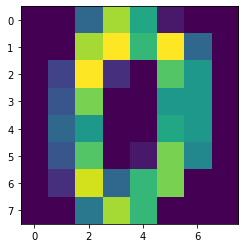

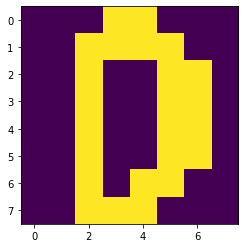

In [17]:
im_num = 0
plt.imshow(X[im_num].reshape((8,8)))
plt.show()
plt.imshow(X_proc[im_num].reshape((8,8)))
plt.show()

In [18]:
x_data =[]
y_data = []
for i,image in enumerate(X_proc):
    for j,pixel in enumerate(image):
        if pixel!=0:
            x_data.append(j)
            y_data.append(y[i])

In [19]:
y_data = np.array(y_data)
x_data = np.array(x_data)

In [39]:
import importlib
importlib.reload(ib)

<module 'InfBot' from '/home/sunghyuk/Python/GitHub/Information Bottleneck/InfBot.py'>

In [40]:
ib_mnist = ib.IB(beta=250,dim_hidden=10,seed=42,check_result=True)
ib_mnist.fit(x_data,y_data)

In [41]:
ib_mnist.I_xy

0.1631005609101318

In [42]:
ib_mnist.pz_x.sum(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [43]:
ib_mnist.pz.sum()

1.0

In [44]:
print('I(Z,X)',ib_mnist.track['I_xz'])
print('I(Z,Y)',ib_mnist.track['I_yz'])

I(Z,X) [0.33798809336188956, 1.819026913337642, 2.104960351383953, 2.1369162057426268, 2.179044837110484, 2.209401593100867, 2.193691012007922, 2.2205112901373276, 2.2115442188052494, 2.2183953367436344, 2.2191962416984707, 2.219175311824575, 2.2191714360533146, 2.219170562788668, 2.219170328322983, 2.2191702589092657, 2.2191702374168902, 2.2191702306371948, 2.219170228482681]
I(Z,Y) [0.020203482386783468, 0.08178092455527307, 0.09515856703840565, 0.0992532161626952, 0.10057759686113317, 0.10174667163807921, 0.10224743903154282, 0.10406300813905811, 0.10431379219181856, 0.1046264245515309, 0.10463435365182258, 0.10463427359719682, 0.10463425810445016, 0.1046342546096083, 0.10463425367172889, 0.10463425339415491, 0.10463425330822199, 0.10463425328111634, 0.10463425327250266]


In [45]:
ib_mnist.px.shape

(55,)

In [46]:
ib_mnist.px.sum()

1.0

In [47]:
np.max(ib_mnist.px_z[:,0])

0.2729455456709374

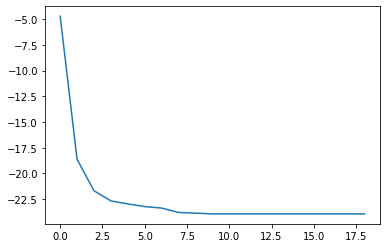

In [49]:
plt.plot(ib_mnist.L)

In [30]:
# from sklearn.preprocessing import KBinsDiscretizer as kbd
# from scipy.sparse import csr_matrix
# X_bined = kbd(n_bins=10,strategy='quantile',encode='ordinal').fit_transform(X)

## Let's see the most influent pixel for predicting a number

In [31]:
np.max(ib_mnist.py_z,axis=0)

array([0.16205344, 0.17092931, 0.14015904, 0.15655519, 0.14668837,
       0.20863971, 0.23001631, 0.14285714, 0.11786543, 0.11147269])

In [32]:
ib_mnist.py_z[:,6]

array([0.19453507, 0.07381729, 0.03915171, 0.01590538, 0.23001631,
       0.06239804, 0.17128874, 0.09298532, 0.10195759, 0.01794454])

For example, we have : $P(Y=4|Z=6) = 0.23$  
It means that for predicting the number 4, the most relevant group is the 6th.
Thus we look at the distribution $P(X|Z=6)$.  
In the same manner, I look for 5 most 'probable latent groups Z' explaining the digit 4.

In [33]:
nb_groups = 10

In [34]:
probas_index = np.argsort(-ib_mnist.py_z[4,:])
probas_index5 = probas_index[:nb_groups]

In [35]:
x_supp = np.unique(x_data)
number_rpz = np.zeros((64,nb_groups))
px_6 = ib_mnist.px_z[:,probas_index5]
for i,x in enumerate(x_supp):
    number_rpz[x,:] = px_6[i]

In [36]:
# Summing probabilites of all latent group.
# It is meaningfull since the most probable explain the image
number_rpz_sum = number_rpz.sum(axis=1)

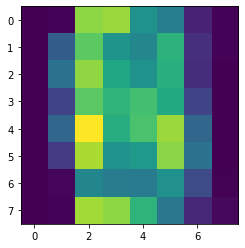

In [37]:
plt.imshow(number_rpz_sum.reshape((8,8)))
plt.show()

Iteratively :

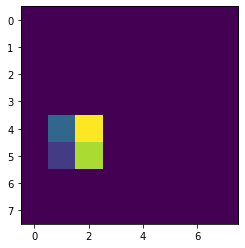

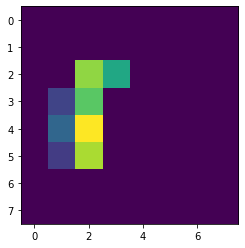

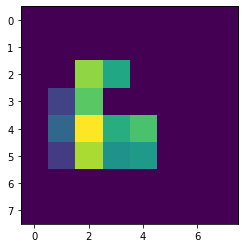

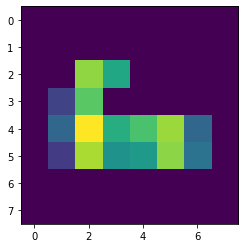

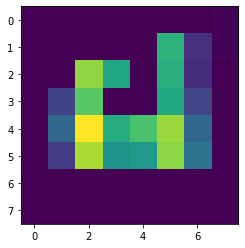

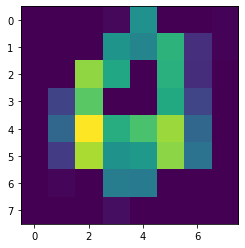

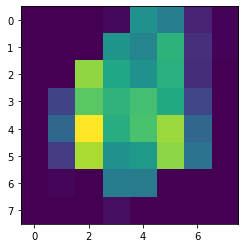

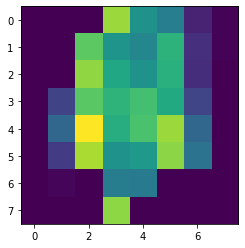

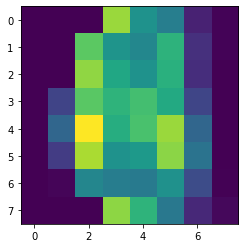

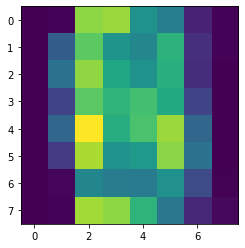

In [38]:
number_rpz_cumsum = np.cumsum(number_rpz,axis=1)
for i in range(number_rpz_cumsum.shape[1]):
    plt.imshow(number_rpz_cumsum[:,i].reshape((8,8)))
    plt.show()

# With Gaussian data

To do after

In [214]:
x_norm = np.random.normal(0,1,y.shape[0])

In [215]:
x_norm_bined = kbd(encode='ordinal',strategy='uniform').fit_transform(x_norm.reshape((-1,1)))
x_norm_bined = x_norm_bined.reshape(-1)

NameError: name 'kbd' is not defined

In [ ]:
plt.hist(x_norm_bined)